<a href="https://colab.research.google.com/github/rukka0808/fsdl-text-recognizer-2021-labs/blob/lab2/fsdl_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# FSDL Spring 2021 Setup
!git clone https://github.com/full-stack-deep-learning/fsdl-text-recognizer-2021-labs
%cd fsdl-text-recognizer-2021-labs
!pip3 install boltons wandb pytorch_lightning==1.1.4 pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 torchtext==0.8.1 -f https://download.pytorch.org/whl/torch_stable.html
%env PYTHONPATH=.:$PYTHONPATH

Cloning into 'fsdl-text-recognizer-2021-labs'...
remote: Enumerating objects: 791, done.
remote: Counting objects: 100% (223/223), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 791 (delta 161), reused 141 (delta 141), pack-reused 568
Receiving objects: 100% (791/791), 18.88 MiB | 24.98 MiB/s, done.
Resolving deltas: 100% (399/399), done.
/content/fsdl-text-recognizer-2021-labs
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 194kB 6.3MB/s 
     |████████████████████████████████| 1.8MB 9.1MB/s 
     |████████████████████████████████| 686kB 23.8MB/s 
     |███████████████████████         | 834.1MB 1.4MB/s eta 0:03:44tcmalloc: large alloc 1147494400 bytes == 0x55d8709a2000 @  0x7f586ab2b615 0x55d837a2ecdc 0x55d837b0e52a 0x55d837a31afd 0x55d837b22fed 0x55d837aa5988 0x55d837aa04ae 0x55d837a333ea 0x55d837aa57f0 0x55d837aa04ae 0x55d837a333ea 0x55d837aa232a 0x55d837b23e36 0x55d837aa1853 0x55d837b23e36 0x55d837aa

In [2]:
cd lab2

/content/fsdl-text-recognizer-2021-labs/lab2


In [5]:
!python3 training/run_experiment.py --model_class=CNN --data_class=MNIST --max_epochs=5 --gpus=1

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
9920512it [05:04, 31945.68it/s]                 Extracting /content/fsdl-text-recognizer-2021-labs/data/downloaded/MNIST/raw/train-images-idx3-ubyte.gz to /content/fsdl-text-recognizer-2021-labs/data/downloaded/MNIST/raw

0it [00:00, ?it/s]
32768it [00:00, 257499.76it/s]
Extracting /content/fsdl-text-recognizer-2021-labs/data/downloaded/MNIST/raw/train-labels-idx1-ubyte.gz to /content/fsdl-text-recognizer-2021-labs/data/downloaded/MNIST/raw

0it [00:00, ?it/s]
  0% 0/1648877 [00:00<?, ?it/s]
  1% 16384/1648877 [00:00<00:25, 64498.74it/s]
  1% 24576/1648877 [00:00<00:32, 49481.80it/s]
  2% 32768/1648877 [00:00<0

In [7]:
!python3 training/run_experiment.py --model_class=CNN --data_class=EMNIST --max_epochs=50 --gpus=1 --num_workers=4

/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
709MB [00:17, 41.8MB/s]               
Computing SHA-256...
Unzipping EMNIST...
Loading training data from .mat file
Balancing classes to reduce amount of data
Saving to HDF5 in a compressed format...
Saving essential dataset parameters to text_recognizer/datasets...
Cleaning up...
2021-05-25 08:20:15.981419: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0

   | Name             | Type      | Params
------------------------------------------------
0  | model            | CNN       | 1.7 M 
1  | model.conv1      | ConvBlock | 640   
2  | model

In [8]:
# Looking at Emnist data

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import nltk
import numpy as np

%load_ext autoreload
%autoreload 2

from importlib.util import find_spec
if find_spec("text_recognizer") is None:
    import sys
    sys.path.append('..')

from text_recognizer.data.emnist_lines import EMNISTLines, construct_image_from_string, get_samples_by_char
from text_recognizer.data.sentence_generator import SentenceGenerator

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
sentence_generator = SentenceGenerator()
for _ in range(4):
    print(sentence_generator.generate(max_length=16))

[nltk_data] Downloading package brown to /content/fsdl-text-
[nltk_data]     recognizer-2021-labs/data/downloaded/nltk...
[nltk_data]   Unzipping corpora/brown.zip.
he had swung
you
value of
hill


In [15]:
import argparse
args = argparse.Namespace(max_length=16, max_overlap=0)
dataset = EMNISTLines(args)
dataset.prepare_data()
dataset.setup()
print(dataset)
print('Mapping:', dataset.mapping)

EMNISTLinesDataset generating data for train...
EMNISTLinesDataset generating data for val...
EMNISTLinesDataset generating data for test...
EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0
Num classes: 83
Dims: (1, 28, 448)
Output dims: (16, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 448]), torch.float32, tensor(0.), tensor(0.0735), tensor(0.2316), tensor(1.))
Batch y stats: (torch.Size([128, 16]), torch.int64, tensor(3), tensor(66))

Mapping: ['<B>', '<S>', '<E>', '<P>', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', ' ', '!', '"', '#', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '?']


In [16]:
def convert_y_label_to_string(y, dataset=dataset):
    return ''.join([dataset.mapping[i] for i in y])

y_example = dataset.data_train[0][1]
print(y_example, y_example.shape)
convert_y_label_to_string(y_example)

[55 47 40 58 44 66 54 45  3  3  3  3  3  3  3  3] (16,)


'phase of<P><P><P><P><P><P><P><P>'

phase of<P><P><P><P><P><P><P><P>
jobs Each of<P><P><P><P>
New<P><P><P><P><P><P><P><P><P><P><P><P><P>
the<P><P><P><P><P><P><P><P><P><P><P><P><P>
Tribal<P><P><P><P><P><P><P><P><P><P>
in<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
fatal<P><P><P><P><P><P><P><P><P><P><P>
a complete<P><P><P><P><P><P>
resolutely at<P><P><P>


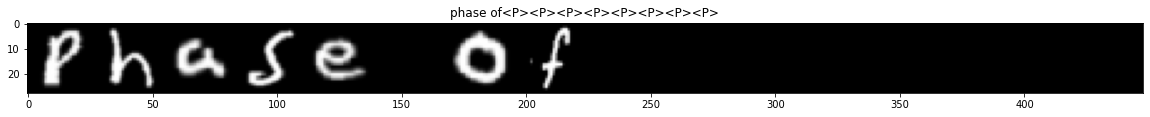

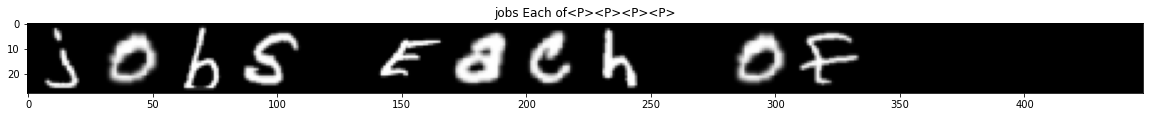

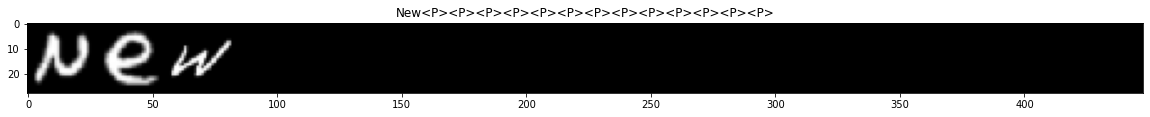

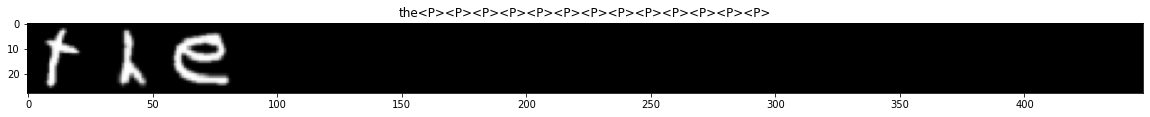

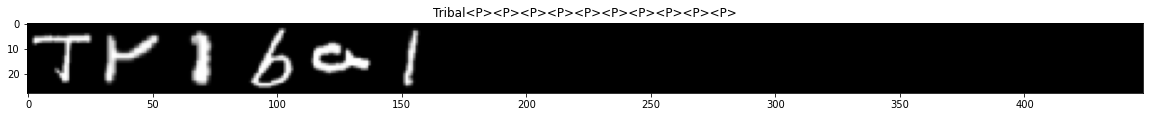

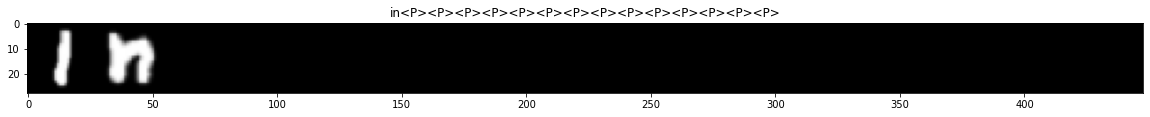

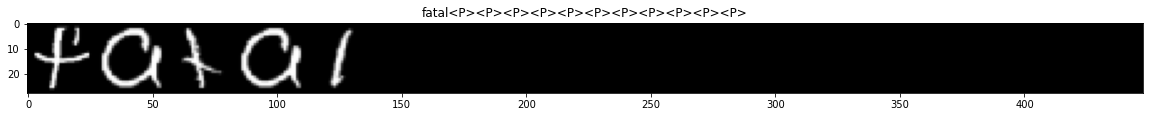

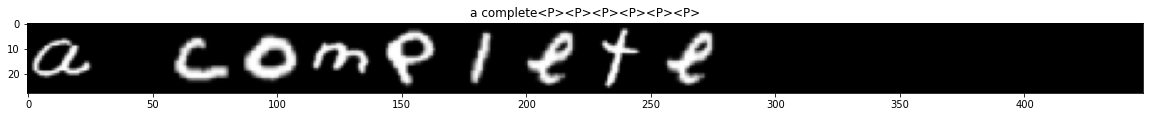

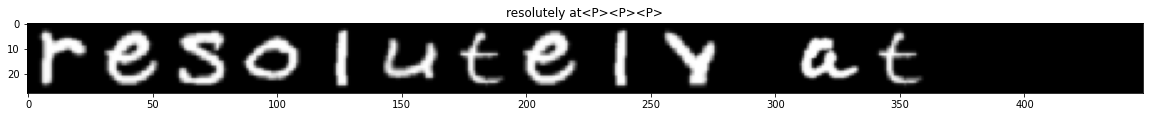

In [17]:

num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    x, y = dataset.data_train[i]
    sentence = convert_y_label_to_string(y) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(x.squeeze(), cmap='gray')

Let's now expand the maximum number of characters in a line, and add a random amount of overlap between the letters.

In [18]:
args = argparse.Namespace(max_length=34, max_overlap=0.33)
dataset = EMNISTLines(args)
dataset.prepare_data()
dataset.setup()
print(dataset)

EMNISTLinesDataset generating data for train...
EMNISTLinesDataset generating data for val...
EMNISTLinesDataset generating data for test...
EMNISTLinesDataset loading data from HDF5...
EMNIST Lines Dataset
Min overlap: 0
Max overlap: 0.33
Num classes: 83
Dims: (1, 28, 952)
Output dims: (34, 1)
Train/val/test sizes: 10000, 2000, 2000
Batch x stats: (torch.Size([128, 1, 28, 952]), torch.float32, tensor(0.), tensor(0.0754), tensor(0.2344), tensor(1.))
Batch y stats: (torch.Size([128, 34]), torch.int64, tensor(3), tensor(66))



phase of Newark will<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
the fire for washing<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
go much further than<P><P><P><P><P><P><P><P><P><P><P><P><P><P>
up Dont<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
resolutely at<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
abrupt end<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
high ground<P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P><P>
voyage The sickness was<P><P><P><P><P><P><P><P><P><P><P>
I said Its a kindness to<P><P><P><P><P><P><P><P><P><P>


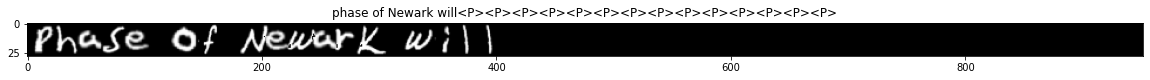

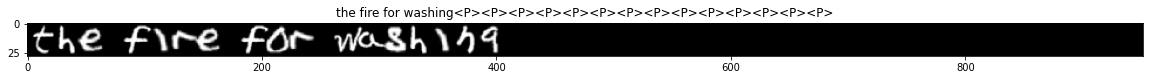

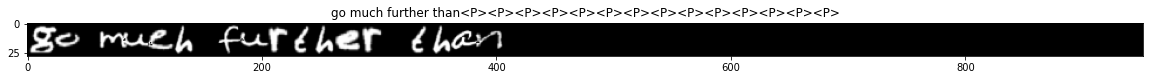

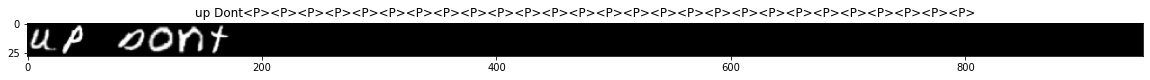

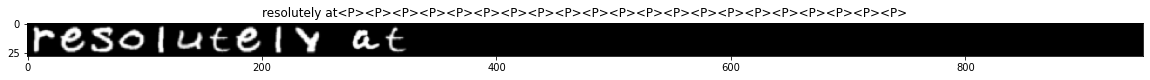

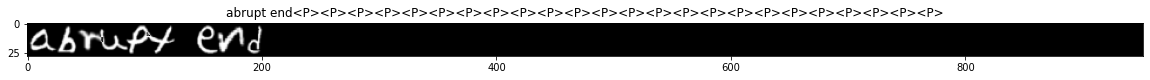

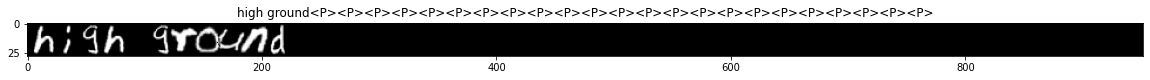

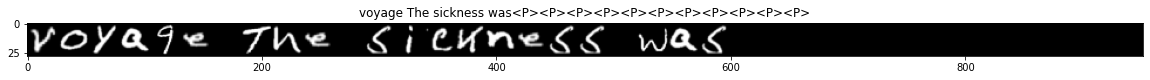

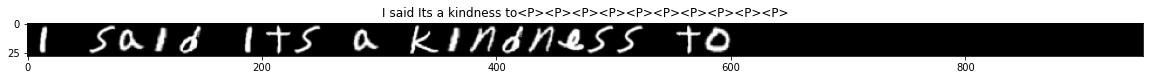

In [19]:
num_samples_to_plot = 9

for i in range(num_samples_to_plot):
    plt.figure(figsize=(20, 20))
    x, y = dataset.data_train[i]
    sentence = convert_y_label_to_string(y) 
    print(sentence)
    plt.title(sentence)
    plt.imshow(x.squeeze(), cmap='gray')